<a href="https://colab.research.google.com/github/ayushi15/ayushi15/blob/main/GOTNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import operator
import numpy as np
from matplotlib.pyplot import figure
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
s4_edges = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s4-edges.csv')

In [3]:
s4_nodes = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s4-nodes.csv')

In [4]:
s5_edges = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv')
s5_nodes = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-nodes.csv')
s6_edges = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s6-edges.csv')
s6_nodes = pd.read_csv('https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s6-nodes.csv')

In [6]:
s4 = s4_edges['Source'].value_counts().reset_index()
s4.head()

,index,Source
0,CERSEI,28
1,JOFFREY,26
2,ARYA,24
3,JON,20
4,JAIME,19


In [8]:
s5 = temp = s5_edges['Source'].value_counts().reset_index()
s5.head()

,index,Source
0,CERSEI,29
1,LITTLEFINGER,20
2,JON,18
3,ARYA,11
4,JAIME,11


In [9]:
s6 = s6_edges['Source'].value_counts().reset_index()
s6.head()

,index,Source
0,CERSEI,24
1,JON,21
2,DAVOS,20
3,ARYA,17
4,JAIME,16


In [10]:
nodes_interest4 = list(s4_edges[s4_edges.Target == "CERSEI"].Source.head(20)) + ["CERSEI"]
nodes_interest5 = list(s5_edges[s5_edges.Target == "CERSEI"].Source.head(20)) + ["CERSEI"]
nodes_interest6 = list(s6_edges[s6_edges.Target == "CERSEI"].Source.head(20)) + ["CERSEI"]

In [11]:
nodes_interest4

['BRIENNE', 'CATELYN', 'AERYS', 'BARRISTAN', 'BRONN', 'CERSEI']

In [12]:
nodes_interest5

['BRONN', 'CERSEI']

In [13]:
nodes_interest6

['ARYA', 'BIANCA', 'BOBONO', 'CERSEI']

In [15]:
G4 = nx.from_pandas_edgelist(s4_edges, "Source", "Target", create_using=nx.DiGraph(), edge_attr="Weight")

In [16]:
G4

In [17]:
G5 = nx.from_pandas_edgelist(s5_edges, "Source", "Target", create_using=nx.DiGraph(), edge_attr="Weight")

In [18]:
G6 = nx.from_pandas_edgelist(s6_edges, "Source", "Target", create_using=nx.DiGraph(), edge_attr="Weight")

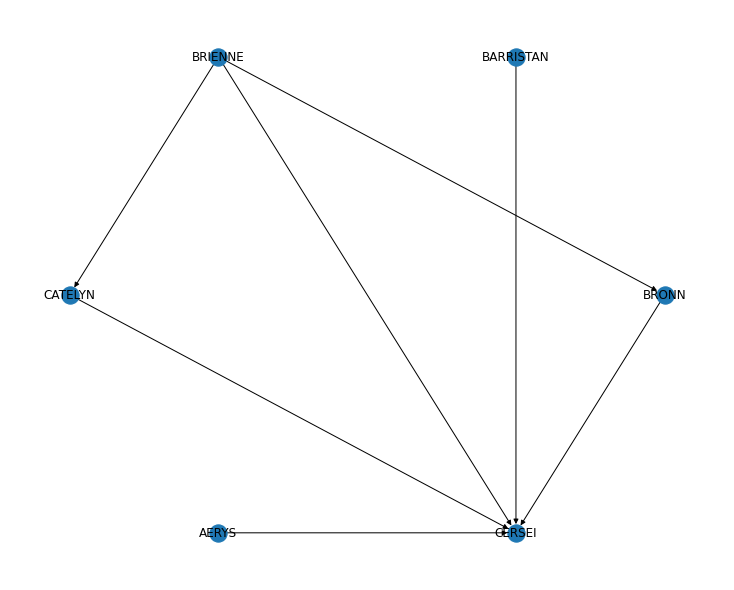

In [19]:
figure(figsize=(10, 8))
nx.draw_shell(G4.subgraph(nodes=nodes_interest4), with_labels=True)

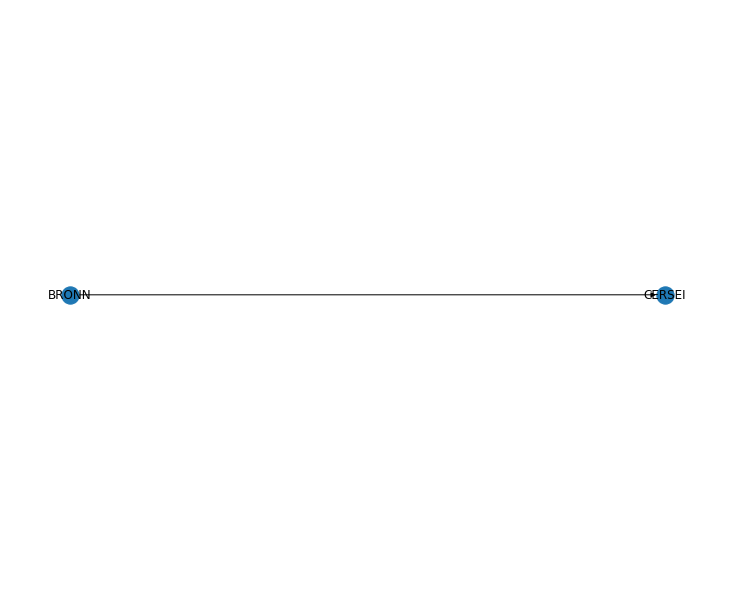

In [20]:
figure(figsize=(10, 8))
nx.draw_shell(G5.subgraph(nodes=nodes_interest5), with_labels=True)

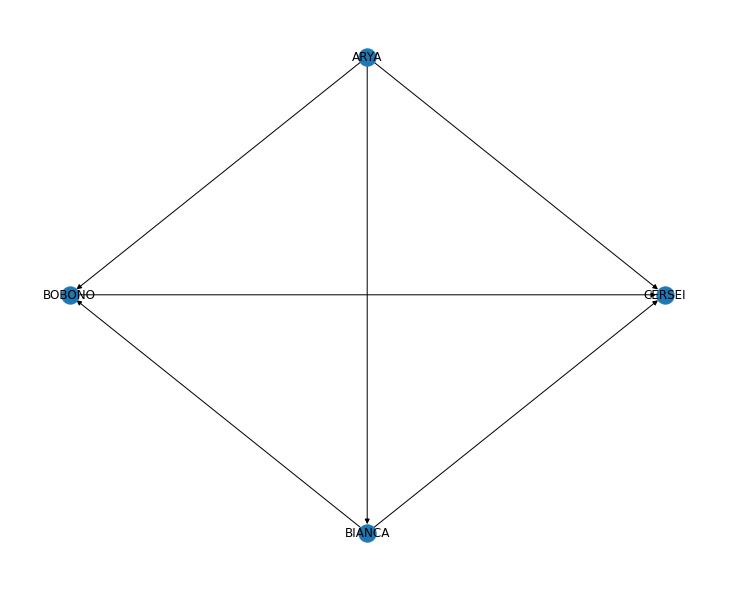

In [21]:
figure(figsize=(10, 8))
nx.draw_shell(G6.subgraph(nodes=nodes_interest6), with_labels=True)

In [22]:
#from pickle import FALSE
deg_cen_s4 = nx.degree_centrality(G4)
sorted(deg_cen_s4.items(), key=lambda x:x[1], reverse=True)[0:10]

[('JOFFREY', 0.23391812865497075),
 ('TYRION', 0.2222222222222222),
 ('CERSEI', 0.19298245614035087),
 ('SANSA', 0.18128654970760233),
 ('JON', 0.17543859649122806),
 ('JAIME', 0.1695906432748538),
 ('TYWIN', 0.16374269005847952),
 ('SAM', 0.14619883040935672),
 ('OBERYN', 0.14619883040935672),
 ('ARYA', 0.14035087719298245)]

In [23]:
deg_cen_s5 = nx.degree_centrality(G5)
sorted(deg_cen_s5.items(), key=lambda x:x[1], reverse=True)[0:10]

[('CERSEI', 0.2542372881355932),
 ('JON', 0.211864406779661),
 ('LITTLEFINGER', 0.211864406779661),
 ('STANNIS', 0.2033898305084746),
 ('SANSA', 0.17796610169491525),
 ('SAM', 0.1694915254237288),
 ('TYRION', 0.16101694915254236),
 ('JAIME', 0.1440677966101695),
 ('DAENERYS', 0.11864406779661017),
 ('BRONN', 0.1016949152542373)]

In [24]:
deg_cen_s6 = nx.degree_centrality(G6)
sorted(deg_cen_s6.items(), key=lambda x:x[1], reverse=True)[0:10]

[('SANSA', 0.2836879432624113),
 ('JON', 0.21985815602836878),
 ('CERSEI', 0.19148936170212766),
 ('TYRION', 0.18439716312056736),
 ('JAIME', 0.1702127659574468),
 ('DAVOS', 0.1631205673758865),
 ('NED', 0.1631205673758865),
 ('TORMUND', 0.14893617021276595),
 ('RAMSAY', 0.1347517730496454),
 ('DAENERYS', 0.1276595744680851)]

In [27]:
books = [G4]
book_fnames = ['https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv','https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s5-edges.csv', 'https://raw.githubusercontent.com/mathbeveridge/gameofthrones/master/data/got-s6-edges.csv']
for book_fname in book_fnames:
    book = pd.read_csv(book_fname)
    G_book = nx.Graph()
    for _, edge in book.iterrows():
        G_book.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])
    books.append(G_book)

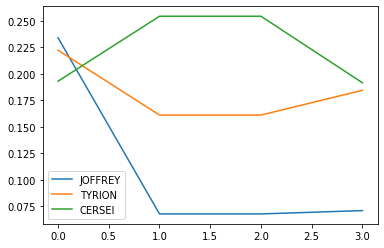

In [30]:
%matplotlib inline

# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books]
 
# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of Eddard-Stark, Tyrion-Lannister and Jon-Snow
degree_evol_df[['JOFFREY', 'TYRION', 'CERSEI']].plot()